In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob
from PIL import Image

In [2]:
#importing dataset and splitting it into training ans test set
((trainX, trainY), (testX, testY)) = cifar10.load_data()

#scaling the image data
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0

In [3]:
#converting the Labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [4]:
#initializing the label Names
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
             'frog','horse', 'ship', 'truck']

# Model

In [5]:
opt = SGD(lr = 0.01)
batch_size = 32
epochs = 40

In [6]:
def model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = (32,32, 3)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [7]:
model = model()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [8]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size = batch_size, epochs = epochs, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 32s 633us/sample - loss: 1.8028 - acc: 0.3686 - val_loss: 1.7226 - val_acc: 0.3858
Epoch 2/40
50000/50000 [==============================] - 32s 639us/sample - loss: 1.5524 - acc: 0.4591 - val_loss: 1.4427 - val_acc: 0.5007
Epoch 3/40
50000/50000 [==============================] - 32s 644us/sample - loss: 1.3907 - acc: 0.5144 - val_loss: 1.3508 - val_acc: 0.52423907 - acc: 0.514
Epoch 4/40
50000/50000 [==============================] - 31s 619us/sample - loss: 1.3065 - acc: 0.5430 - val_loss: 1.3144 - val_acc: 0.5358
Epoch 5/40
50000/50000 [==============================] - 31s 619us/sample - loss: 1.2529 - acc: 0.5648 - val_loss: 1.3689 - val_acc: 0.5073
Epoch 6/40
50000/50000 [==============================] - 32s 638us/sample - loss: 1.2147 - acc: 0.5769 - val_loss: 1.2931 - val_acc: 0.5452
Epoch 7/40
50000/50000 [==============================] - 32s 644us/sample - loss: 1.18

In [11]:
#evaluating the network
predictions = model.predict(testX, batch_size = 32)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1), target_names = labelNames))

              precision    recall  f1-score   support

    airplane       0.67      0.56      0.61      1000
  automobile       0.70      0.74      0.72      1000
        bird       0.42      0.49      0.46      1000
         cat       0.43      0.41      0.42      1000
        deer       0.61      0.46      0.53      1000
         dog       0.52      0.49      0.51      1000
        frog       0.65      0.70      0.68      1000
       horse       0.65      0.68      0.66      1000
        ship       0.65      0.81      0.72      1000
       truck       0.71      0.66      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



In [13]:
H.history

{'loss': [1.802821413116455,
  1.5523605864715577,
  1.3907035807037353,
  1.3064768437194825,
  1.252927745780945,
  1.2147270631790161,
  1.1837904946136475,
  1.1546733935165405,
  1.1308325072669982,
  1.1061498670196532,
  1.0833420936965943,
  1.0624581176376342,
  1.0399317797470093,
  1.0227374257278443,
  1.0059760008621217,
  0.9874661281585694,
  0.9711964395904541,
  0.9541241455078125,
  0.9373087913894653,
  0.92222333568573,
  0.9080647128677368,
  0.8920952461051941,
  0.8779579297637939,
  0.864392726726532,
  0.8502374361038209,
  0.8365199173736573,
  0.8230330116844177,
  0.8111111054420471,
  0.798156607952118,
  0.784137805404663,
  0.7710538006591797,
  0.7617616654968262,
  0.747061528186798,
  0.7356671924781799,
  0.7259682754325867,
  0.714335255355835,
  0.7017866717529296,
  0.6939491797542572,
  0.6806636974906921,
  0.6714009936332702],
 'acc': [0.36858,
  0.45906,
  0.51436,
  0.54304,
  0.56484,
  0.57686,
  0.58712,
  0.59636,
  0.60562,
  0.61542,
  0

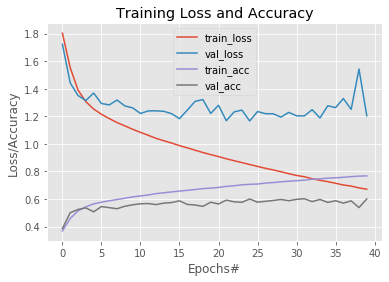

In [14]:
#plotting the training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 40), H.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 40), H.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 40), H.history['acc'], label = 'train_acc')
plt.plot(np.arange(0, 40), H.history['val_acc'], label = 'val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs#')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()